In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
people = pd.read_excel('data/2021인구현황.xlsx')
people = people.drop(0)
people.head(5)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
1,1111000000,서울특별시 종로구,"144,683","144,683","6,984","10,381","22,802","19,470","20,969","24,957",...,"5,224","11,829","9,763","10,833","12,383","10,213","6,461","3,667",660,23
2,1114000000,서울특별시 중구,"122,499","122,499","6,299","6,474","18,309","19,886","17,379","20,043",...,"3,268","9,832","9,977","8,481","9,877","9,060","5,588","3,146",591,15
3,1117000000,서울특별시 용산구,"222,953","222,953","12,653","14,692","32,778","37,719","33,781","36,122",...,"7,248","17,346","19,078","17,130","18,301","15,101","8,983","5,385",990,51
4,1120000000,서울특별시 성동구,"285,990","285,990","19,222","18,903","43,463","46,815","43,346","46,154",...,"9,467","22,068","23,783","21,613","23,308","19,310","11,160","5,583",859,34
5,1121500000,서울특별시 광진구,"339,996","339,996","17,744","24,774","61,616","54,715","50,470","53,801",...,"12,206","32,772","27,558","25,610","27,438","23,160","11,904","5,715",909,38


In [3]:
for i in range(len(people['행정기관'])) :
    people.iloc[i, 1] = people.iloc[i, 1][6:len(people.iloc[i, 1])-1]

In [4]:
people.head(5)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
1,1111000000,종로구,"144,683","144,683","6,984","10,381","22,802","19,470","20,969","24,957",...,"5,224","11,829","9,763","10,833","12,383","10,213","6,461","3,667",660,23
2,1114000000,중구,"122,499","122,499","6,299","6,474","18,309","19,886","17,379","20,043",...,"3,268","9,832","9,977","8,481","9,877","9,060","5,588","3,146",591,15
3,1117000000,용산구,"222,953","222,953","12,653","14,692","32,778","37,719","33,781","36,122",...,"7,248","17,346","19,078","17,130","18,301","15,101","8,983","5,385",990,51
4,1120000000,성동구,"285,990","285,990","19,222","18,903","43,463","46,815","43,346","46,154",...,"9,467","22,068","23,783","21,613","23,308","19,310","11,160","5,583",859,34
5,1121500000,광진구,"339,996","339,996","17,744","24,774","61,616","54,715","50,470","53,801",...,"12,206","32,772","27,558","25,610","27,438","23,160","11,904","5,715",909,38


In [5]:
size = pd.read_excel('data/구별면적.xls')
size = size.drop(0)
size.head(5)

,기간,자치구,면적,구성비(%),행정,법정,통,반
1,2020,종로구,23.91,3.95,17,87,279,1475
2,2020,중구,9.96,1.65,15,74,253,1580
3,2020,용산구,21.87,3.61,16,36,354,2581
4,2020,성동구,16.86,2.79,17,17,467,3626
5,2020,광진구,17.06,2.82,15,7,363,2999


In [6]:
def population_density(people_value, size_value) :
    return people_value/size_value

In [7]:
population_density_dict = dict()
for i in range(len(people['행정기관'])) :
    key = people.iloc[i,1]
    value_list = []
    value_list.append(population_density(float(people.iloc[i,2].replace(',','')), float(size.iloc[i,2])))
    type(key)
    population_density_dict[key] = value_list

In [8]:
population_density_dict

{'종로구': [6051.150146382267],
 '중구': [12299.096385542167],
 '용산구': [10194.467306812985],
 '성동구': [16962.633451957296],
 '광진구': [19929.42555685815],
 '동대문구': [23727.144866385373],
 '중랑구': [20937.837837837837],
 '성북구': [17515.378356387308],
 '강북구': [12677.203389830507],
 '도봉구': [15368.813559322034],
 '노원구': [14417.494356659143],
 '은평구': [15930.89868731067],
 '서대문구': [17289.790130459445],
 '마포구': [15467.714884696015],
 '양천구': [25692.245835726593],
 '강서구': [13858.952702702703],
 '구로구': [19719.38369781312],
 '금천구': [17727.419354838712],
 '영등포구': [15349.775967413441],
 '동작구': [23576.941896024462],
 '관악구': [16425.39736219141],
 '서초구': [8775.627926777353],
 '강남구': [13494.73417721519],
 '송파구': [19437.201062887514],
 '강동구': [18815.128100854006]}

In [9]:
data = pd.read_csv('data/우리동네키움센터 .csv', encoding='cp949')

In [56]:
center = {}
for i in range(len(data['자치구명'].unique())) :
    index = str(data['자치구명'].value_counts().index[i])
    value = int(data['자치구명'].value_counts()[i])
    
    center[index] = value
center

{'노원구': 28,
 '구로구': 17,
 '송파구': 16,
 '동작구': 13,
 '영등포구': 12,
 '성동구': 11,
 '성북구': 10,
 '광진구': 10,
 '은평구': 9,
 '강남구': 7,
 '중구': 7,
 '용산구': 7,
 '마포구': 7,
 '서대문구': 7,
 '종로구': 6,
 '서초구': 6,
 '강동구': 6,
 '도봉구': 6,
 '동대문구': 4,
 '강서구': 4,
 '중랑구': 3,
 '강북구': 3,
 '양천구': 3,
 '금천구': 3,
 '관악구': 2}

In [11]:
data1 = pd.read_csv('data/지역아동센터 시설현황정보 .csv', encoding='cp949')

In [12]:
child_center = {}
for i in range(len(data1['자치구명'].unique())) :
    index = str(data1['자치구명'].value_counts().index[i])
    value = int(data1['자치구명'].value_counts()[i])
    
    child_center[index] = value
child_center

{'성북구': 27,
 '관악구': 27,
 '은평구': 27,
 '금천구': 27,
 '노원구': 24,
 '양천구': 24,
 '구로구': 24,
 '중랑구': 23,
 '강동구': 23,
 '동작구': 22,
 '강북구': 21,
 '강서구': 20,
 '송파구': 19,
 '영등포구': 17,
 '도봉구': 17,
 '동대문구': 14,
 '광진구': 13,
 '종로구': 12,
 '성동구': 12,
 '서초구': 11,
 '마포구': 11,
 '서대문구': 7,
 '용산구': 5,
 '강남구': 4,
 '중구': 4}

In [13]:
child_center_count = []
center_count = []
keys = []

# 인구밀도, 지역아동센터, 우리동네키움센터, 지역아동센터+우리동네키움센터
for key in population_density_dict.keys() :
    for key1 in child_center.keys() :
        if(key == key1) :
            population_density_dict[key].append(child_center[key1])
    for key2 in center.keys() :
        if(key == key2) :
            population_density_dict[key].append(center[key2])
    sum_count = population_density_dict[key][1] + population_density_dict[key][2]
    population_density_dict[key].append(sum_count)

In [14]:
population_density_dict['종로구']

[6051.150146382267, 12, 6, 18]

In [49]:
result = pd.DataFrame(population_density_dict, index = ['인구밀도', '지역아동센터', '우리동네키움센터', '돌봄교실갯수'])

In [50]:
result = result.transpose()

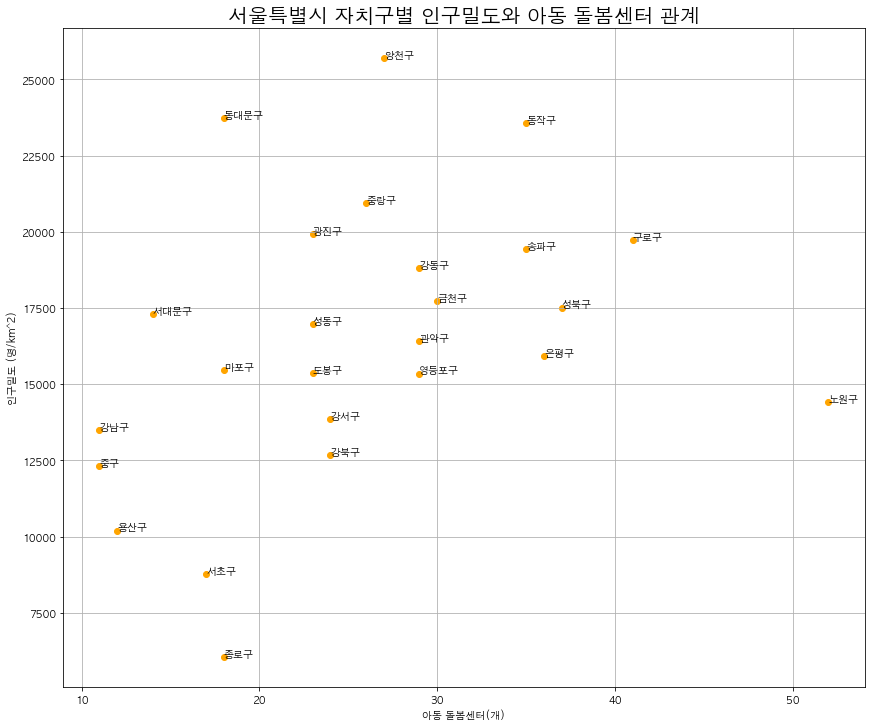

In [51]:
y = list(result['인구밀도'])
x = list(result['돌봄교실갯수'])
fig, ax = plt.subplots(figsize=(12,10))

file_name = '서울특별시 자치구별 인구밀도와 아동 돌봄센터 관계'
plt.title(file_name, fontsize=20)

plt.scatter(x, y, color='orange')

for i, label in enumerate(population_density_dict.keys()):
    plt.text(x[i], y[i], label)
    

plt.grid()
plt.tight_layout()
plt.ylabel('인구밀도 (명/km^2)')
plt.xlabel('아동 돌봄센터(개)')
plt.savefig('result/' + file_name + '.png')
plt.show();

In [57]:
result

,인구밀도,지역아동센터,우리동네키움센터,돌봄교실갯수
종로구,6051.150146,12.0,6.0,18.0
중구,12299.096386,4.0,7.0,11.0
용산구,10194.467307,5.0,7.0,12.0
성동구,16962.633452,12.0,11.0,23.0
광진구,19929.425557,13.0,10.0,23.0
동대문구,23727.144866,14.0,4.0,18.0
중랑구,20937.837838,23.0,3.0,26.0
성북구,17515.378356,27.0,10.0,37.0
강북구,12677.203390,21.0,3.0,24.0
도봉구,15368.813559,17.0,6.0,23.0


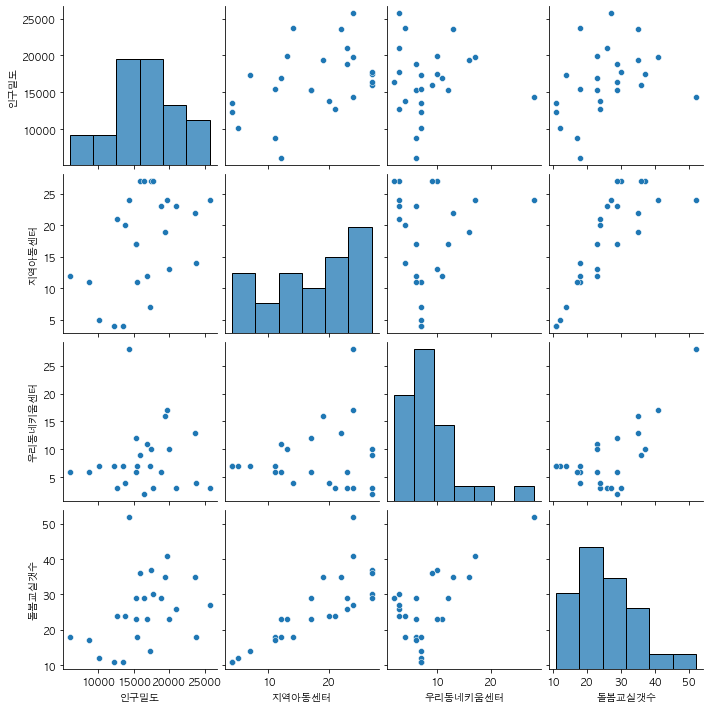

In [58]:
sns.pairplot(result[['인구밀도', '지역아동센터', '우리동네키움센터', '돌봄교실갯수']])
plt.show()

In [53]:
model = sm.OLS.from_formula("인구밀도 ~ 지역아동센터 + 우리동네키움센터 + 돌봄교실갯수", data=result)
result1 = model.fit()

In [54]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.709
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0888
Time:                        12:37:39   Log-Likelihood:                -243.14
No. Observations:                  25   AIC:                             492.3
Df Residuals:                      22   BIC:                             495.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.184e+04   2427.703      4.875      0.000    6800.682    1.69e+04
지역아동센터       181.8021     97.685      1.861      0.076     -20.785     384.389
우리동네키움센터     -94.2813    114.001     -0.827      0.417    -330.705     142.142
돌봄교실갯수        87.5209     60.889      1.437      0.165     -38.755     213.797
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.115
Skew:                           0.084   Prob(JB):                        0.944
Kurtosis:                       2.714   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""